# Problem 1 (Practice)

The file 'sunspots.txt' provided with the homework contains the observed number of sunspots on the Sun for each month sin January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

(a) Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months. (20 pts)

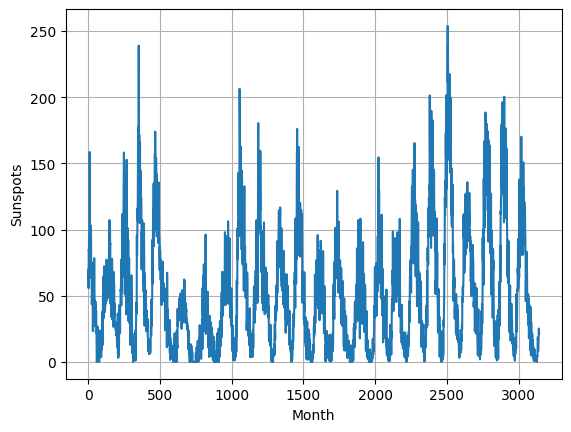

3143


In [105]:
'''
1. import the necessary libraries
2. load dataset from the current directory and plot the graph
'''
import numpy as np
import matplotlib.pyplot as plt

month, sunspots = np.loadtxt('sunspots.txt', unpack=True)

plt.plot(month, sunspots)
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.grid(True)
plt.show()
print(len(month))

Total observation length is 3143 and the number of peak in the graph is 24. So, we estimate the length of the cycle is 3143/24 = 130.958

(b) Using the np.fft package, Calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$-also called the power spectrum of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$. Set your plot axis limits appropriately so that this peak is discernible. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it-meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data. (20 pts)

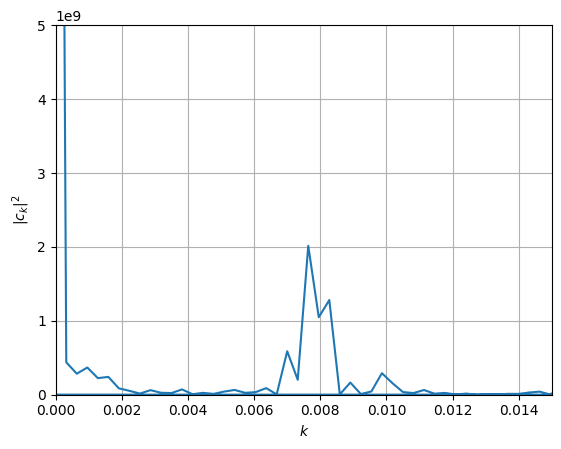

In [106]:
'''
1. fourier transform the sunspot data for power spectrum 
2. And then plot it
'''
sunspots_fft = np.fft.fft(sunspots)
k = np.fft.fftfreq(len(month), 1)

plt.plot(k, abs(sunspots_fft)**2)
plt.xlim(0, 0.015)
plt.xlabel('$k$')
plt.ylim(0, 5e9)
plt.ylabel('$|c_k|^2$')
plt.grid(True)
plt.show()

(c) Find the approximate value of $k$ to which the peak corresponds. What is the period of the sine wave with this value of $k$? You should find that the period corresponds roughly to the length of the cycle that you estimated in part (a). This is the so-called "solar cycle," and the exact reason behind this period is still a longstanding mystery. (10 pts)

A: The approximated value of k which the peak correspond is k = 0.0077, then the period is rounghly T = 1/k = 129.87, nearly 130 months

---
# Problem 2 (Practice)

The file 'dow.txt' contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

(a) Read in the data from the file. Compute the Fourier transform. Plot the raw data and then the logarithm of the Fourier transformed (absolute) data. (20 pts)

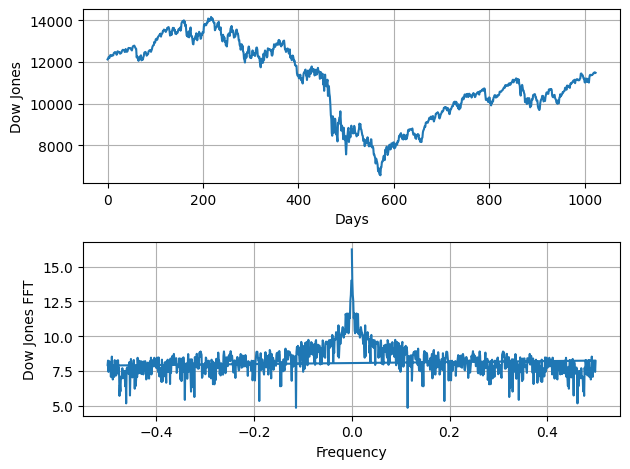

In [107]:
'''
1. load the dow jones data from the current directory
2. compute the fourier transform
3. compute the frequency
4. plot the raw data and the logarithm of the fourier transformed data
'''
dow = np.loadtxt('dow.txt')
dow_fft = np.fft.fft(dow)
freq = np.fft.fftfreq(len(dow), 1)

fig, ax = plt.subplots(2, 1)
ax[0].plot(dow)
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Dow Jones')
ax[0].grid(True)
ax[1].plot(freq, np.log(np.abs(dow_fft)))
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Dow Jones FFT')
ax[1].grid(True)
plt.tight_layout()
plt.show()


(b) Now set all but 10% of the lowest frequencies to zero. In other words, set everything in the Fourier transformed data to zero except the first 51 elements and the last 51 elements. Calculate the inverse transform and plot the result on the same graph as the raw data. Comment on what you see. What is happening when you set the Fourier coefficients to zero? (20 pts)

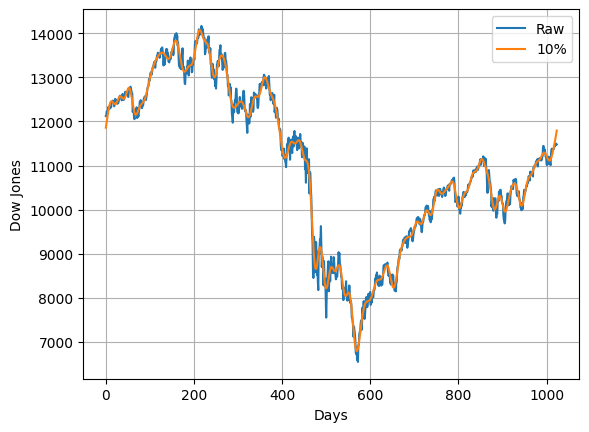

In [108]:
'''
set 10% of the lowest frequencies to zero
plot the raw data and the filtered data
'''
dow_fft_10 = dow_fft.copy()
dow_fft_10[51:-51] = 0
dow_10 = np.fft.ifft(dow_fft_10)

plt.plot(dow)
plt.plot(dow_10.real)
plt.xlabel('Days')
plt.ylabel('Dow Jones')
plt.legend(['Raw', '10%'])
plt.grid(True)
plt.show()


A: The filtered curve graph is more smoother than the original raw curve graph because higher frequency components are filtered out.

(c) Modify your program so that it sets all but the 2% of the lowest frequencies to zero and run it again. (10 pts)

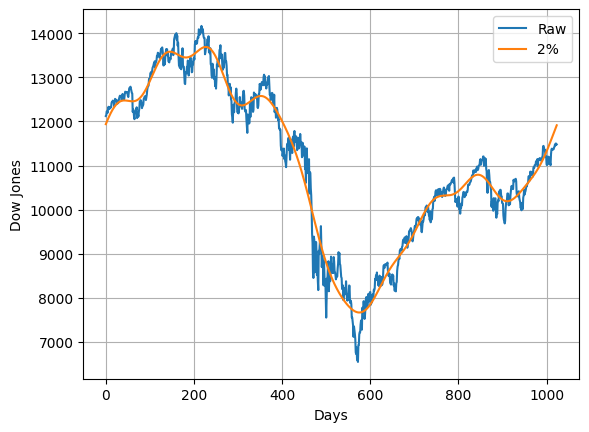

In [109]:
'''
set 2% of the lowest frequencies to zero
plot the raw data and the filtered data
'''
dow_fft_2 = dow_fft.copy()
dow_fft_2[10:-10] = 0
dow_2 = np.fft.ifft(dow_fft_2)

plt.plot(dow)
plt.plot(dow_2.real)
plt.xlabel('Days')
plt.ylabel('Dow Jones')
plt.grid(True)
plt.legend(['Raw', '2%'])

---
# Problem 3

The function $f(t)$ represents a square-wave with amplitude 1 and frequency 1 Hz:
\begin{align*}
f(t) = \begin{cases}
    1 & \text{if } ⌊2t⌋ \text{ is even}\\
    -1 & \text{if } ⌊2t⌋ \text{ is odd}\\
  \end{cases}
\end{align*}
where $⌊x⌋$ means $x$ rounded down to the next lowest integer. Let us attempt to smooth this function using a Fourier transform, as we did in the previous exercise.

(a) Write a program that creates an array of $N=1024$ elements containing equally spaced samples from a single cycle of this square-wave and plot it. (10 pts)

/var/folders/x1/k24pyyhs04bb7784s3d75spr0000gn/T/ipykernel_89420/2082990229.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


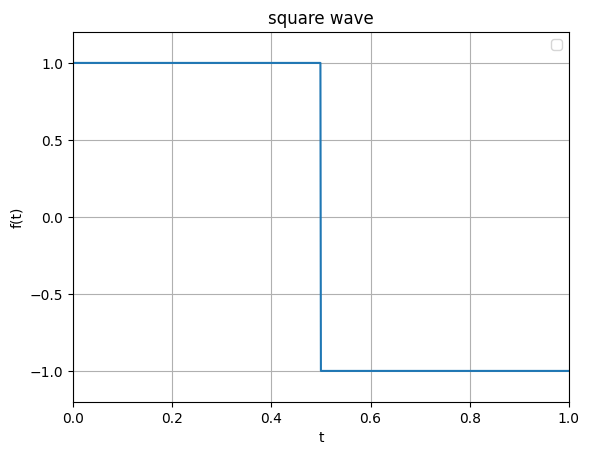

In [110]:
'''
define the uniformly spaced points in [0,1) with N=1024
Define the square wave on the one-cycle domain
'''
N = 1024
t = np.linspace(0.0, 1.0, N, endpoint=False)
square_wave = np.where(np.floor(2*t) % 2 == 0, 1.0, -1.0)

plt.plot(t, square_wave)
plt.xlim(0, 1)
plt.ylim(-1.2, 1.2)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('square wave')
plt.grid(True)
plt.legend()

(b) Calculate the Fourier transform of the array. Now set all but the twenty lowest frequency Fourier coefficients to zero, i.e., set everything except the first 10 and the last 10 elements to zero, then invert the Fourier transform again to recover the smoothed signal. Make a plot of the result and on the same axes show the original square-wave as well. Unlike in Problem 2, you should find that the signal is not simply smoothed-there are artifacts, wiggles, in the results. Explain briefly where these come from.

Artifacts similar to these arise when Fourier coefficients are discarded in audio and visual compression schemes and are the primary source of imperfections in digitally compressed sound and images. (15 pts)

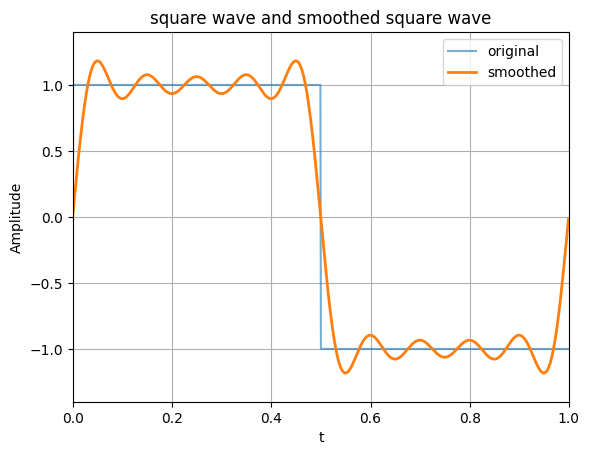

In [111]:
'''
1. FFT, keep 20 lowest-frequency coefficients (first 10 and last 10), then IFFT
2. compute the fft of the square wave
3. define the complex array of zeros and then keep the first 10 and last 10 elements
4. finally, invert the fft to smoothed signal via taking only real part
5. plot overlay plot
'''
square_wave_fft = np.fft.fft(square_wave)
square_wave_fft[10:-10] = 0
square_wave_smooth = np.fft.ifft(square_wave_fft)

plt.plot(t, square_wave, label='original', alpha=0.6)
plt.plot(t, square_wave_smooth.real, label='smoothed', linewidth=2)
plt.xlim(0, 1)
plt.ylim(-1.4, 1.4)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('square wave and smoothed square wave')
plt.grid(True)
plt.legend()
plt.show()

Ripples appear (Gibbs phenomenon). Sqaure wave in this domain [0,1) contains a jump from 1 to -1. at t = 0.5. This jump type wave contains a lot of high-frequency signal but we only keep the 20 lowest frequencies, that is, high-frequency components are removed. So, the wiggles appear especially near the discontinuities.

---
# Problem 4

In this problem, we will attempt to restore a blurred image using Fourier transforms.

(a) Load the file 'blurred.txt' and plot the image using plt.imshow with colormap 'gray'. (10 pts)

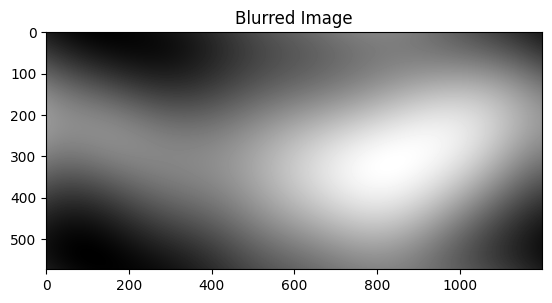

In [112]:
# load the blurred image dataset and plot it
blurred_image = np.loadtxt('blurred.txt')
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

(b) This 1200x574 image has been intentionally blurred with a Gaussian point spread function of width $\sigma=100$, or
\begin{align*}
  f(x,y) = \frac{1}{2\pi \sigma^2}\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right).
\end{align*}
Can you tell what this image is? Probably not. Generally for any image or data, this represents a noise source, e.g., atmospheric disturbances that blur an astronomical image.

Mathematically, denoting the original image data as $O(x,y)$, the blurred image data $B(x,y)$ is
\begin{align*}
  B(x,y) = \int\int dx' dy' O(x',y')f(x-x',y-y').
\end{align*}
Construct the Gaussian point spread function $f(x,y)$ which has the same dimensions as the blurred image. Your function should be periodic, since Fourier transform for a finite domain assumes that the integrand is periodic. In other words, the point spread function should look something like the image below. Note the bright Gaussian spots at each of the corners. [Hint: Construct the spread function so that the bright Gaussian spot is in the middle of the domain, and then apply the np.fft.fftshit function] (15 pts)

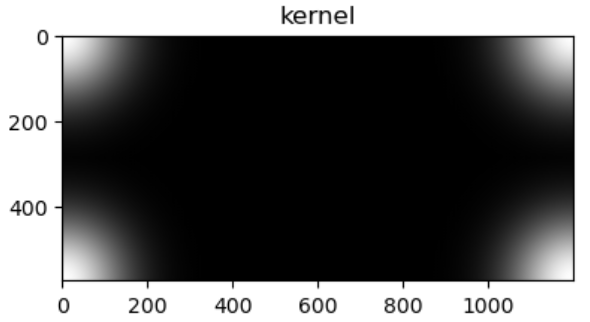

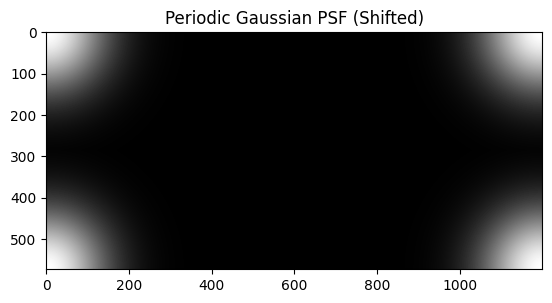

In [113]:
'''
1. coordinate is centered at the image center
2. so we do this by shifting the index y and x. now the (0,0) is center of the image
3. define the gaussian psf and shift it
'''
sigma = 100
Ny, Nx = blurred_image.shape
y, x = np.indices((Ny, Nx))
y, x = y - Ny//2, x - Nx//2

psf = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
psf_shifted = np.fft.fftshift(psf)

plt.imshow(psf_shifted, cmap='gray')
plt.title('Periodic Gaussian PSF (Shifted)')
plt.show()

(c) Using the convolution theorem and denoting the Fourier transform by a tilde, we have
\begin{align*}
  \tilde{B}(k_x,k_y) = \tilde{f}(k_x,k_y)\tilde{O}(k_x,k_y),
\end{align*}
so theoretically, we can retrieve the original image by noting
\begin{align*}
  O(x,y) = \frac{1}{2\pi}\int\frac{\tilde{B}}{\tilde{f}}e^{i\mathbf{k}\cdot\mathbf{x}}d\mathbf{k}
\end{align*}
Try to implement this solution naively using the np.fft.fft2 and np.fft.ifft2 functions and plot the result. [Hint: both the Fourier transform and its inverse gives complex values, so you have to plot the real part only]. Does it work? (15 pts)

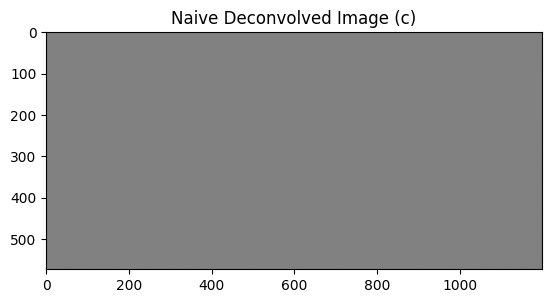

In [114]:
'''
Define the B tilda and f tilda follow by above definition via implimenting fft
retrieve the naive original image using above equation
'''
blurred_image_ft = np.fft.fft2(blurred_image)
psf_ft = np.fft.fft2(psf_shifted)
ori_image = np.fft.ifft2(blurred_image_ft / psf_ft)

plt.imshow(ori_image.real, cmap='gray')
plt.title('Naive Deconvolved Image (c)')
plt.show()

(d) The issue is as follows: the Gaussian point spread function is also a Gaussian in Fourier space, which is near zero for most of its domain, and therefore dividing by $\tilde{f}$ is like dividing by zero at these points. For a Gaussian point spread function, this corresponds to high-frequency errors dominating the signal deconvolution. One way to suppress these high-frequency errors is to introduce a small regularization parameter $\epsilon$. For $|\tilde{f}|$ values much smaller than $\epsilon$, the latter replaces the former. Show that applying this concept leads to the following solution:
\begin{align*}
  O(x,y) = \frac{1}{2\pi}\int\frac{\tilde{B}\tilde{f}^*}{|\tilde{f}|^2+\epsilon^2}e^{i\mathbf{k}\cdot\mathbf{x}}d\mathbf{k}.
\end{align*} (15 pts)

Proof

Let $\tilde{f}^*$ be complex conjugate of $\tilde{f}$

$$
\tilde{O} = \frac{\tilde{B}}{\tilde{f}} \cdot \frac{\tilde{f}^*}{\tilde{f}^*} = \frac{\tilde{B}\tilde{f}^*}{|\tilde{f}|^2}
$$

Add a properly small $\epsilon^2$ to the denominator

$$
\tilde{O} = \frac{\tilde{B}\tilde{f}^*}{|\tilde{f}|^2 + \epsilon^2}
$$

Thus, when $|\tilde{f}|^2 \to 0$, the $\epsilon^2$ term dominates, preventing the denominator be zero


(e) Apply this algorithm for $\epsilon=10^{-5}, 10^{-15}, 10^{-17}$ and plot all three results on the same figure. For which value can you clearly discern what the image is? Interpret the result for each value of $\epsilon$. (20 pts)

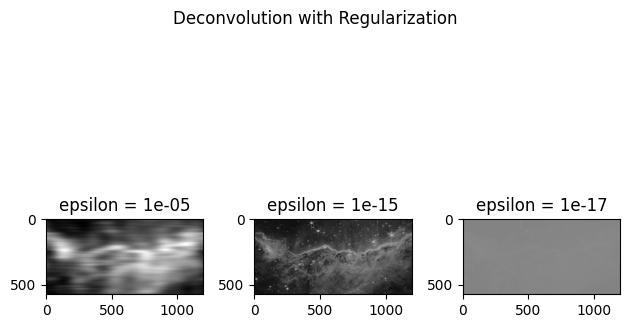

In [115]:
'''
- set the regularization parameter epsilon and perform deconvolution with regularization
- in the for loop, implement the deconvolution with different epsilons and plot it
'''
epsilons = [1e-5, 1e-15, 1e-17]
fig, axes = plt.subplots(1, 3)
fig.suptitle('Deconvolution with Regularization')

for i, eps in enumerate(epsilons):
    ori_image_ft = (blurred_image_ft * np.conj(psf_ft)) / (np.abs(psf_ft)**2 + eps**2)
    restored_image = np.fft.ifft2(ori_image_ft)

    ax = axes[i]
    ax.imshow(restored_image.real, cmap='gray')
    ax.set_title(f'epsilon = {eps:.0e}')

plt.tight_layout()
plt.show()

We can discern the image when epsilon is 1e-15

- $\epsilon = 10^{-5}$ is too large. The image is little blurred and smoothed since $\epsilon = 10^{-5}$ suppresses too many signal's high-frequency components

- $\epsilon = 10^{-15}$ is proper. The image is clearly deblurred

- $\epsilon = 10^{-17}$ is too small. The image is similar to the image in part (c) since $\epsilon^2 \approx 10^{-34}$ is negligible compared to most values in $|\tilde{f}|^2$